# Python para Análise de Dados - Pandas  

<p> Iremos trabalhar com base de imóveis que obtive no site Kaggle. 

Você pode fazer Download diretamente no nosso **GitHub**, [aqui](https://github.com/minerandodados/mdrepo/blob/master/kc_house_data.csv)



In [1]:
# Importando o Pandas.
import pandas as pd

In [ ]:
# Lendo uma base de dados no formato .csv.
# o parâmetro sep é usado para definir qual o separador entre os dados.
# o parâmetro header informo em qual linha está minhas colunas ou se elas não existem.
# Se não existe colunas (header=None) o pandas dará um número para cada atributo da base.
arquivo = '/home/rodrigo/curso/Python Para Data Análise/kc_house_data.csv'

dataset = pd.read_csv(arquivo, sep=',' ,header=0)

In [ ]:
# Imprimindo o tipo da variável dataset
# Dataframe é um estrutura de dados onde linhas podem ter colunas de diferentes tipos.
type(dataset)

In [ ]:
# Metodo head() imprime as 5 linhas iniciais do dataframe.
dataset.head()

In [ ]:
# O parâmetro index_col informa a coluna na qual o dataframe será indexado
dataset = pd.read_csv(arquivo, sep=',', index_col='date')

In [ ]:
dataset = pd.read_csv(arquivo, sep=',', usecols=['id','date','price','bedrooms'])

In [ ]:
# Metodo head() imprime as 5 linhas iniciais do dataframe.
dataset.head()

In [ ]:
# Imprimindo a 100 primeiras linhas do dataframe.
dataset.head(100)

In [ ]:
# Atributo columns retorna o nome das colunas do dataframe.
dataset.columns

In [ ]:
# Método count() retorna a quantidade de linhas de todas as colunas.
dataset.count()

In [ ]:
# Método describe() exibe informações estatísticas da base de dados. 
# Várias informações como desvio padrão, média, valor mínimo e valor máximo de colunas.
dataset.describe()

In [ ]:
# Imprime as 5 ultimas linhas .
dataset.tail(100)

In [ ]:
# Imprime uma amostra aleatória do dataset.
dataset.sample(5)

In [ ]:
# Retorna em formato de tupla a quantidade de linhas e colunas do dataset.
dataset.shape

In [ ]:
# Imprime informações sobre colunas e uso de memória.
dataset.info()

# Trabalhando com Grandes Arquivos

+ Quando estamos trabalhando com _**Grandes Arquivos**_ temos um desafio um grande desafio que é gerenciar a memória.
+ As vezes precisamos manipular uma base de dados muito grande e por isso precisamos trabalhar com arquivos de forma diferente.
* Uma forma é ler esses arquivos de forma limitada para não consumir toda a _**memória**_ do servidor.

In [ ]:
# Lendo as 5 primeiras linhas do arquivo.
dataset = pd.read_csv(arquivo, sep=',')

In [ ]:
dataset.head(2)

In [ ]:
# O parâmetro chunksize define em quantas linhas cada bloco irá conter.
chunk = pd.read_csv(arquivo, chunksize=10000)

In [ ]:
type(chunk)

In [ ]:
# Imprimindo tamanho das partes do arquivo chunk.
for parte in chunk:
    print (len(parte))

In [ ]:
# O parâmetro chunksize define em quantas linhas cada bloco irá conter.
chunk = pd.read_csv(arquivo, chunksize=10000)

In [ ]:
# Interese sobre cada parte do dataframe em seguida adicione o valor processado a uma nova coluna do dataset.
lista = []
for parte in chunk:
    lista.append(parte['bedrooms'] * 2)

dataset['bedrooms_size'] = pd.concat(lista)

In [ ]:
dataset

# Consultando um Dataset

* Podemos fazer _**consultas**_ em um Dataframe, isso se assemelha a linhagem SQL.

* Existem métodos interessantes para fazer consultas usando operadores lógicos (>,<,== ).

* Além disso podemos fazer consultas usando instruções de agrupamento, por exemplo. 

* Isso da muita flexibilidade para o Cientista de dados na hora de explorar da base de dados.

In [ ]:
# Conta a quantidade de valores únicos
pd.value_counts(dataset['bedrooms'])

In [ ]:
# O método loc() é usado para visualizar informações do dataset.
# Este método recebe uma lista por parâmetro e retorna o resultado da consulta.
# Consulta imóveis com 3 quartos
dataset.loc[dataset['bedrooms'] == 3]

In [ ]:
# Usando o método loc() junto com o operador &
# Consulta imóveis com 3 quartos e com o número de banheiros maior que 2
dataset.loc[(dataset['bedrooms']==3) & (dataset['bathrooms'] > 2)]

In [ ]:
# O método sort_values() ordena o dataset pela coluna 'price' em ordem descrescente.
# Apenas o retorno da query será ordenado, não a organização do dataset.
dataset.sort_values(by='price', ascending=False)

In [ ]:
# Usando o método count() para contar o número de linhas de uma query.
dataset[dataset['bedrooms']==4].count()

# Alterando o dataset

In [ ]:
dataset.head()

In [ ]:
# Adicionando uma coluna ao Dataframe.
dataset['size'] = (dataset['bedrooms'] * 20)

In [ ]:
# Visualizando o conteúdo da coluna criada.
dataset['size'].head()

In [ ]:
# Criando uma função para processamento de dados.
def categoriza(s):
    if s >= 80:
        return 'Big'
    elif s >= 60:
        return 'Medium'
    elif s >= 40:
        return 'Small'

In [ ]:
# Criando uma nova coluna a partir do processamento realizado.
dataset['cat_size'] = dataset['size'].apply(categoriza)

In [ ]:
# Visualizando a nova coluna criada.
dataset['cat_size'].head()

In [ ]:
# Ver a distribuicao da coluna com o método value_counts.
pd.value_counts(dataset['cat_size'])

In [ ]:
# O método drop é usado para excluir dados no dataframe.
# A opção axis=1 define que queremos excluir uma coluna e não uma linha.
# O parâmetro inplace define que a alteração irá modificar o objeto em memória.

dataset.drop(['cat_size'], axis=1, inplace=True)

In [ ]:
# Apagando a coluna 'size'
dataset.drop(['size'], axis=1, inplace=True)

In [ ]:
# Visualizando o dataset.
dataset.head()

**Apagando linhas baseado em Condições lógicas!**

In [ ]:
# Dropa linhas com bedrooms = 0
dataset.drop(dataset[dataset.bedrooms==0].index ,inplace=True)

In [ ]:
# Dropa linhas maiores que 30
dataset.drop(dataset[dataset.bedrooms>30].index ,inplace=True)

# Missing Values

* **Missing Values** são valores faltantes em colunas, esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados.

* Missing Values podem ser um problema em várias situações, como por exemplo, algoritmos de machine learning que não trabalham bem com dados faltantes.

* Estes também podem atrapalhar resultados de análises.

* Vamos aprender como encontrar missing values na base de dados e como manipular esses valores.

In [6]:
arquivo = '/home/rodrigo/curso/Python Para Data Análise/kc_house_data.csv'
dataset = pd.read_csv(arquivo, sep=',', header=0)

In [14]:
# Consultando linhas com valores faltantes.
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
#Com este comando removemos todas as linhas onde tenha pela menos um registro faltante em algum atributo.
dataset.dropna(inplace=True)

In [8]:
# É possível ainda, remover somente linhas que estejam com valores faltantes em todas as colunas, veja:
dataset.dropna(how='all', inplace=True)

In [11]:
#preenche com a media dos valores da coluns floors os values null
dataset['floors'].fillna(dataset['floors'].mean(), inplace=True)

In [13]:
#preenche com 1 os values null da coluna bedrooms
dataset['bedrooms'].fillna(1, inplace=True)

# Visualização de dados

<IPython.core.display.Javascript object>


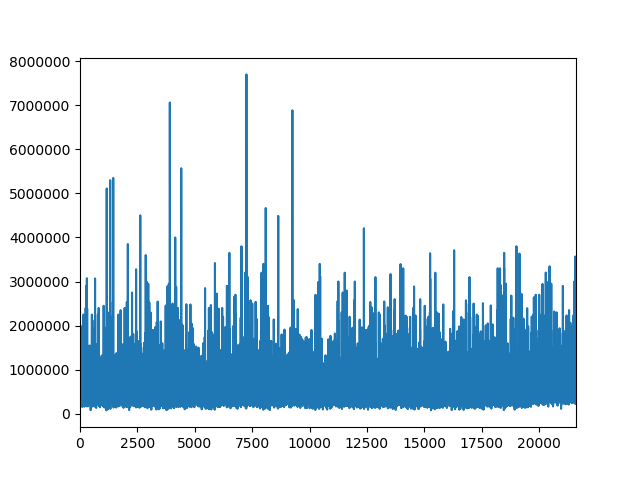

In [15]:
# Plota em um gŕafico de barras o preço dos imóveis
%matplotlib notebook
dataset['price'].plot()

<IPython.core.display.Javascript object>


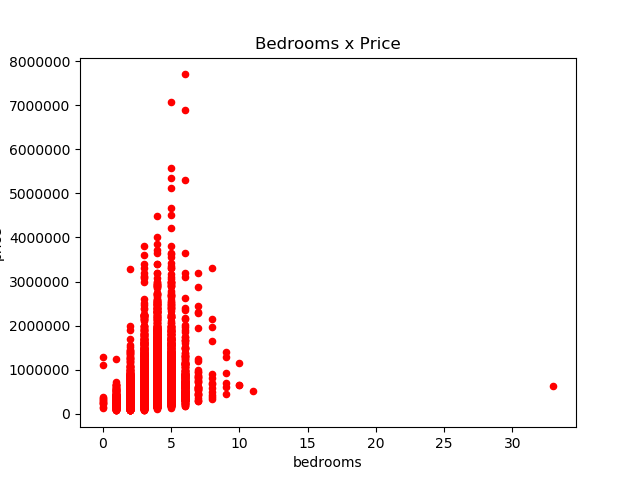

In [16]:
# Plota em gráfico de dispersão o preço e o numero de quartos de imóveis
dataset.plot(x='bedrooms',y='price',kind='scatter', title='Bedrooms x Price',color='r')

<IPython.core.display.Javascript object>


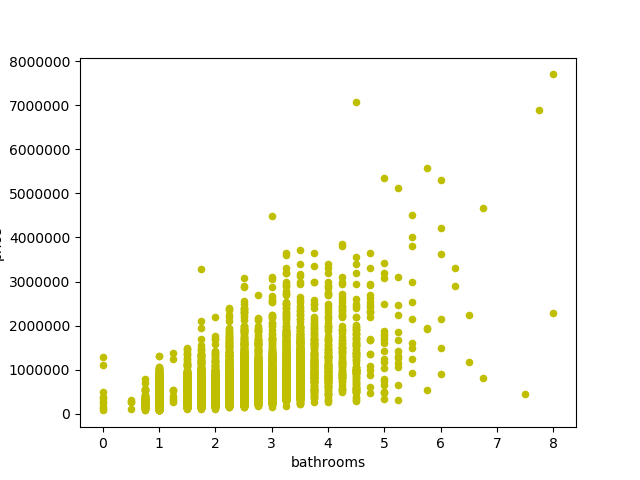

In [17]:
# Plota em gráfico de dispersão o preço e o número de banheiros
dataset.plot(x='bathrooms',y='price',kind='scatter',color='y')